In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
#generate the sample
def gen_data():
    nobs = 1000
    beta = 3
    x = np.random.uniform(low=-3., high=3., size=(nobs,3))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1*(1 + beta * x[:,1] + e >= 0) 
    return y,x,nobs

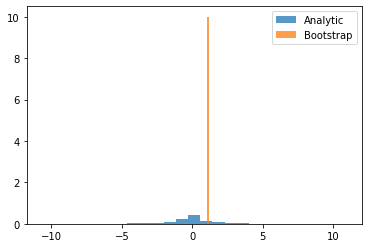

In [18]:
def setup_shi(yn,xn):
    x1n,x2n = xn[:,0:2],xn[:,1:3]
    model1 = sm.Probit(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    ll1 = model1.loglikeobs(model1_fit.params)
    grad1 =  model1.score_obs(model1_fit.params)
    hess1 =  model1.hessian(model1_fit.params)
    
    model2 = sm.Probit(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    ll2 = model2.loglikeobs(model2_fit.params)
    grad2 =  model2.score_obs(model2_fit.params)
    hess2 =  model2.hessian(model2_fit.params)
    
    k1 = len(model1_fit.params)
    k2 = len(model2_fit.params)
    return ll1,grad1,hess1,ll2,k1, grad2,hess2,k2 

yn,xn,nobs = gen_data()
anayltic_stats = vuong_plots.plot_analytic(yn,xn,nobs,setup_shi)
bootstrap_stats = vuong_plots.plot_bootstrap(yn,xn,nobs,setup_shi)
plt.legend()
plt.show()

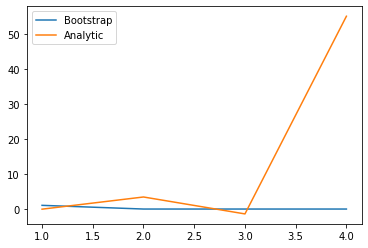

In [19]:
plt.plot(range(1,5),  [ stats.kstat(bootstrap_stats,n=i) for i in range(1,5)], label="Bootstrap")
plt.plot(range(1,5),  [ stats.kstat(anayltic_stats,n=i) for i in range(1,5)], label="Analytic")
plt.legend()

In [6]:
#reg: 0.337, boot: 0.049
#reg: 0.0, boot: 0.0
#reg: [1. 0. 0.], boot: [0.88 0.05 0.07]